<h1>군집 분석</h1>

In [1]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 아이리스 데이터 셋
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# K평균 군집화

기본 군집화

In [3]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
from sklearn.cluster import KMeans
f = KMeans(n_clusters=3,random_state=0)
f.fit(X)

KMeans(n_clusters=3, random_state=0)

In [5]:
f.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [6]:
# 혼동 테이블
pd.crosstab(f.labels_,y)

col_0,0,1,2
row_0,,,
0,0,48,14
1,50,0,0
2,0,2,36


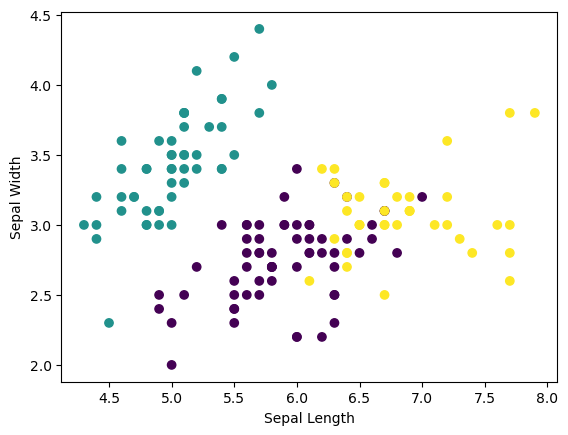

In [7]:
plt.scatter(X[:,0],X[:,1],c=f.labels_)
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
plt.show()

스케일 후 군집화

In [8]:
# 스케일링 하기

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# 정규분포화
Xscaled = scaler.transform(X)

In [9]:
Xscaled[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [10]:
print(X.mean(axis=0), Xscaled.mean(axis=0) )

[5.84333333 3.05733333 3.758      1.19933333] [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


In [11]:
print(X.var(axis=0), Xscaled.var(axis=0) )

[0.68112222 0.18871289 3.09550267 0.57713289] [1. 1. 1. 1.]


In [12]:
f2 = KMeans(n_clusters=3,random_state=0)
f2.fit(Xscaled)
pd.crosstab(f2.labels_,y)

col_0,0,1,2
row_0,,,
0,0,39,14
1,50,0,0
2,0,11,36


In [13]:
pd.crosstab(f.labels_,f2.labels_)

col_0,0,1,2
row_0,,,
0,52,0,10
1,0,50,0
2,1,0,37


# 가우시안 혼합 모델

기본 군집화

In [14]:
from sklearn.mixture import GaussianMixture
f = GaussianMixture(n_components=3,random_state=0)
f.fit(X)

GaussianMixture(n_components=3, random_state=0)

In [15]:
f.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
pd.crosstab(f.predict(X),y)

# 가우시안 혼합 모델이 더 나은 성능을 보임

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,5,50
2,0,45,0


스케일링 후 군집화

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Xscaled = scaler.transform(X)

In [18]:
f2 = GaussianMixture(n_components=3,random_state=0)
f2.fit(Xscaled)

GaussianMixture(n_components=3, random_state=0)

In [19]:
pd.crosstab(f2.predict(Xscaled),y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,45,0
2,0,5,50


In [20]:
pd.crosstab(f.predict(X),f2.predict(Xscaled))

# 스케일 전후 결과 비교

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,0,55
2,0,45,0


# 계층적 군집화

기본 군집화

In [23]:
from sklearn.cluster import AgglomerativeClustering
f = AgglomerativeClustering(
    n_clusters=3,   # 클러스터 개수
    affinity='euclidean',   # 거리 측정 방식: 유클리디안
    linkage='complete'    # linkage: 군집 사이 거리 측정 법; complete: 군집에 포함된 표본들 사이의 최대 거리
  )
f.fit(X)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [24]:
f.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
pd.crosstab(f.labels_,y)

# 0: seb
# 1: versicala
# 2: verginica

col_0,0,1,2
row_0,,,
0,0,23,49
1,50,0,0
2,0,27,1


코싸인 유사도 이용

In [34]:
from sklearn.cluster import AgglomerativeClustering
f = AgglomerativeClustering(
    n_clusters=3,
    affinity='cosine',  # 거리 측정 방식: 코사인 유사도
    linkage='complete'
)
f.fit(X)

AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=3)

In [35]:
pd.crosstab(f.labels_,y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,50,24
2,0,0,26


코싸인 유사도 + Single Linkage

In [39]:
from sklearn.cluster import AgglomerativeClustering
f = AgglomerativeClustering(
    n_clusters=3,
    affinity='cosine',
    linkage='single'
  )
f.fit(X)

AgglomerativeClustering(affinity='cosine', linkage='single', n_clusters=3)

In [40]:
pd.crosstab(f.labels_,y)

col_0,0,1,2
row_0,,,
0,49,0,0
1,0,50,50
2,1,0,0


#연습 문제

1. 당뇨 데이터 셋을 K평균 군집화를 통해 3개의 군집으로 분류하시오. random_state는 0을 사용하시오. 데이터가 이미 스케일되어있기 때문에 따로 스케일할 필요는 없고, Y를 제외한 모든 변수를 사용한다. 각 군집은 몇 개의 데이터를 갖는가? 각 군집별로 Y의 평균을 측정하였을 때, 뚜렷한 차이가 보이는가?

In [64]:
# 당뇨 데이터 셋
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True,as_frame=True)

In [81]:
X, y

(          age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0.019908 

In [65]:
from sklearn.cluster import KMeans
f = KMeans(n_clusters=3,random_state=0)
f.fit(X)

KMeans(n_clusters=3, random_state=0)

In [83]:
# 각 군집별 표본 개수 계산
cluster_counts = [sum(f.labels_ == i) for i in range(3)]
cluster_counts

[128, 164, 150]

In [84]:
# 가장 많은 표본을 포함하고 있는 군집의 표본 개수 출력
max(cluster_counts)

164

In [86]:
# 각 군집별 Y의 평균
cluster_means = [np.mean(y[f.labels_ == i]) for i in range(3)]
cluster_means


[196.5, 109.7560975609756, 160.60666666666665]

In [89]:
# 가장 큰 차이
diffs = [abs(cluster_means[i] - cluster_means[j]) for i in range(3) for j in range(i+1, 3)]
round(max(diffs), 2)

86.74

### 1번 문제

In [90]:
import numpy as np
from sklearn.cluster import KMeans

data = np.array([[1,2], [1,3], [2,0], [3,0]])

f = KMeans(n_clusters=2,random_state=0)
f.fit(data)



KMeans(n_clusters=2, random_state=0)

In [91]:
f.labels_

array([0, 0, 1, 1])

In [54]:
data.var()

1.25

In [52]:
labels = f.labels_
labels

array([0, 0, 1, 1])